# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеки, прочитаем файл и посмотрим что он из себя представляет. Изучим общую информацию, начало таблицы, случайную выборку, статистическую информацию.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.sample()
data.columns
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
#посмотрим в каких столбцах и какое количество пропусков
data.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

##### Вывод

В данных есть несколько проблем:
* Много пропусков
* Не корректные типы данных

Пропуски обнаружены в 14 столбцах из 22:
 - locality_name
 - floors_total
 - living_area
 - kitchen_area 
 - days_exposition 
 - balcony 
 - airports_nearest
 - cityCenters_nearest 
 - ceiling_height
 - parks_around3000 
 - parks_nearest
 - ponds_around3000
 - ponds_nearest
 - is_apartment
 
Типы данных нужно будет изменить у следующих слобцов:
  - first_day_exposition - object на datetime
  - floors_total - float на int, так как количество этажей это целое значение
  - is_apartment - float на bool
  - balcony - float на int, так как количество балконов тоже целое значение
  - days_exposition - float на int
  
  


---

## Шаг 2. Предобработка данных

Заполним пропуски в тех столбцах, для которых есть логическая замена и тех, которые нам понадобятся для дальнейшего исследования.

In [4]:
#заполним пропуски в столбце с высотой потолков медианным значением по всем данным
print('Пропуски в столбце с высотой потолков до:', data['ceiling_height'].isna().sum())
data.loc[data['ceiling_height'].isna(), 'ceiling_height']= data['ceiling_height'].median()
print('Пропуски в столбце с высотой потолков после:', data['ceiling_height'].isna().sum())

#заполним пропуски в столбце с апартаментами, отсутсвие значений скорее всего указывает на то, что квартира апартаментами не является
print('Пропуски в столбце с апартаментами до:', data['is_apartment'].isna().sum())
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
print('Пропуски в столбце с апартаментами после:', data['is_apartment'].isna().sum())

#заполним пропуски в столбце с количеством балконов
#уберем пропущенные значения с заменой их на 0, так как вероятнее всего отсутсвие данных о балконах свидетельствует об их отсутствии в принципе.
print('Пропуски в столбце с количеством балконов до:', data['balcony'].isna().sum())
data.loc[data['balcony'].isna(), 'balcony'] = 0
print('Пропуски в столбце с количеством балконов после:', data['balcony'].isna().sum())

#заполним пропуски в столбцах с площадью жилой и кухни
print('Пропуски в жилой площади до:', data['living_area'].isna().sum())
print('Пропуски в площади кухни до:', data['kitchen_area'].isna().sum())
#пропущенные значения в столбце с жилой площадью заменим медианой, исходя из количества комнат в квартире
for rooms in data['rooms'].unique():
        median = data.loc[data['rooms'] == rooms, 'living_area'].median()
        data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms), 'living_area'] = median
#пропущенные значения в столбце с площадью кухни заменим медианой, исходя из количества комнат в квартире
#а так же в квартирах студиях и квартирах с открытой планировкой, заменим отсутсвующие значения площади кухни на 0
data.loc[(data['kitchen_area'].isna()) & (data['open_plan'] == True), 'kitchen_area'] = 0
data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True), 'kitchen_area'] = 0
print('Пропуски в площади кухни после замены в квартирах-студиях и квартирах с открытой планировкой:', data['kitchen_area'].isna().sum())
for rooms in data['rooms'].unique():
        median = data.loc[data['rooms'] == rooms, 'kitchen_area'].median()
        data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == rooms), 'kitchen_area'] = median
print('Пропуски в жилой площади после преобразований:', data['living_area'].isna().sum())
print('Пропуски в площади кухни после преобразований:', data['kitchen_area'].isna().sum())


Пропуски в столбце с высотой потолков до: 9195
Пропуски в столбце с высотой потолков после: 0
Пропуски в столбце с апартаментами до: 20924
Пропуски в столбце с апартаментами после: 0
Пропуски в столбце с количеством балконов до: 11519
Пропуски в столбце с количеством балконов после: 0
Пропуски в жилой площади до: 1903
Пропуски в площади кухни до: 2278
Пропуски в площади кухни после замены в квартирах-студиях и квартирах с открытой планировкой: 2062
Пропуски в жилой площади после преобразований: 0
Пропуски в площади кухни после преобразований: 0


В столбце с названием населенного пункта провели замену отсутсвующих значений и привели данные к единому виду

In [6]:
data['locality_name'].value_counts()
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data.loc[data['locality_name'].isna(), 'locality_name'] = 'другое'
data['locality_name'] = data['locality_name'].str.replace('коттеджный|поселок|городской|село|деревня','')
data['locality_name'].value_counts()

санкт-петербург                      15721
 мурино                                556
 шушары                                440
всеволожск                             398
пушкин                                 369
                                     ...  
 володарское                             1
 высокоключевой                          1
садовое товарищество приладожский        1
 старое хинколово                        1
 пижма                                   1
Name: locality_name, Length: 326, dtype: int64

Заполним пропуски в данных о расстоянии до центра медианой, по столбцу с населенными пунктами где это возможно, для остальных случаев заполним общей медианой столбца с расстоянием до центра. Для этого напишем функцию, которая на вход будет получать столбец, уникальные медианные значения которого, нужно будет вставить в получаемый на входе второй столбец.

In [7]:
def fill_nan(column1, column2):
    print('Количество пропущенный значений столбца {0} до заполнения'.format(column2), data[column2].isna().sum())
    for name in data[column1].unique():
        median = data.loc[data[column1] == name, column2].median() 
        data.loc[(data[column2].isna()) & (data[column1] == name) , column2] = median
    data.loc[(data[column2].isna()), column2] = data[column2].median()
    print('Количество пропущенный значений в столбце {0} после заполнения'.format(column2), data[column2].isna().sum())

fill_nan('locality_name','cityCenters_nearest')

Количество пропущенный значений столбца cityCenters_nearest до заполнения 5519
Количество пропущенный значений в столбце cityCenters_nearest после заполнения 0


После того как мы заполнили эти пропущенные значения, было решено сделать отдельную таблицу с данными, пригодными для анализа, исключив пропущенные значения в столбцах где замена не представляется возможной. Для некоторых столбцов в новой таблице произведем замену типов данных там где это требуется. 

In [8]:
#новая таблица
good_data = data[~data['floors_total'].isna()]
good_data = good_data[~good_data['days_exposition'].isna()]
#напишем функцию для замены типов данных
def type_changer (column):
    good_data[column] = good_data[column].astype(int)
type_changer('balcony')
type_changer('floors_total')
type_changer('days_exposition')
#для дальнейшего удобства заменим тип данных и в столбце со стоимостью
type_changer('last_price')
good_data.info()
good_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20441 entries, 1 to 23697
Data columns (total 22 columns):
total_images            20441 non-null int64
last_price              20441 non-null int64
total_area              20441 non-null float64
first_day_exposition    20441 non-null object
rooms                   20441 non-null int64
ceiling_height          20441 non-null float64
floors_total            20441 non-null int64
living_area             20441 non-null float64
floor                   20441 non-null int64
is_apartment            20441 non-null bool
studio                  20441 non-null bool
open_plan               20441 non-null bool
kitchen_area            20441 non-null float64
balcony                 20441 non-null int64
locality_name           20441 non-null object
airports_nearest        15775 non-null float64
cityCenters_nearest     20441 non-null float64
parks_around3000        15797 non-null float64
parks_nearest           6902 non-null float64
ponds_around3000      

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,False,...,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.65,5,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14,45.0,9,False,...,9.5,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121
5,10,2890000,30.4,2018-09-10T00:00:00,1,2.65,12,14.4,5,False,...,9.1,0,янино-1,NaN,13261.0,NaN,NaN,NaN,NaN,55


---

## Шаг 3. Посчитайте и добавьте в таблицу

Добавим в таблицу столбцы:
- цену квадратного метра; 
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [9]:
#Напишем функцию для категоризации по этажам
good_data['floor_category'] = 0
def floor_category (row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
#С помощью метода apply, добавим в таблицу новый столбец
good_data['floor_category'] = good_data.apply(floor_category, axis=1)

#добавим новые столбцы соотношений в таблицу поделив один столбец на другой
good_data['price_per_metr'] =  good_data['last_price'] / good_data['total_area']
good_data['living_ratio'] = good_data['living_area'] / good_data['total_area']
good_data['kitchen_ratio'] = good_data['kitchen_area'] / good_data['total_area']
#для удобства заменим тип данных в столбце price_per_metr на int
type_changer('price_per_metr')

#добавим в таблицу столбцы с днем недели, месяцем и годом публикации
#для этого сначала преобразуем значение в столбце first_day_exsposition в формат даты
good_data['first_day_exposition'] = pd.to_datetime(good_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
good_data['weekday'] = pd.to_datetime(good_data['first_day_exposition']).dt.weekday
good_data['month'] = pd.to_datetime(good_data['first_day_exposition']).dt.month
good_data['year'] = pd.to_datetime(good_data['first_day_exposition']).dt.year

---

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

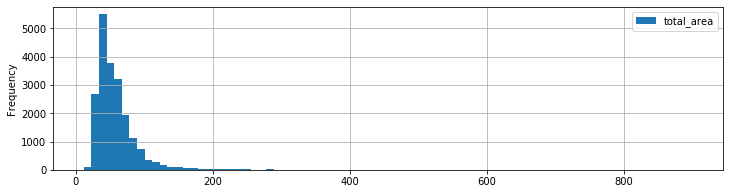

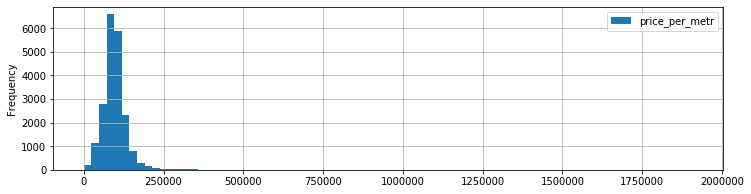

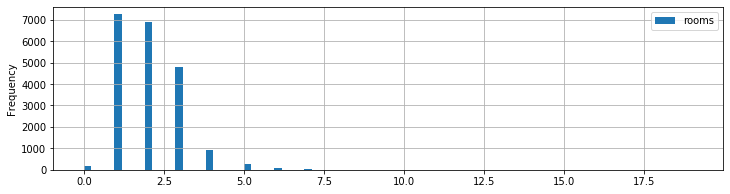

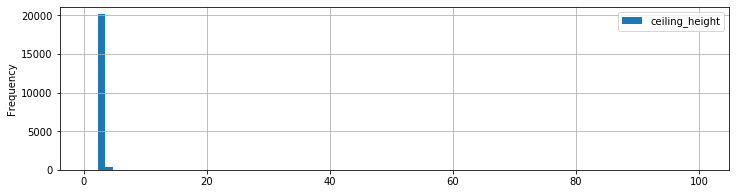

2.65

In [10]:
column_list = ['total_area', 'price_per_metr', 'rooms', 'ceiling_height']

for column in column_list:
    good_data.plot(y=column, kind='hist', bins=80, figsize=(12, 3), grid=True)
    plt.show()

good_data['total_area'].describe()
good_data['total_area'].median()

good_data['price_per_metr'].describe()
good_data['price_per_metr'].median()

good_data['rooms'].describe()
good_data['rooms'].median()

good_data['ceiling_height'].describe()
good_data['ceiling_height'].median()


##### Вывод:

1. Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 59, а медиана 51 м2.

2. Цены за квадратный метр имеет среднее значение в 98 тысяч рублей, медиана 94 тысячи рублей.

3. Больше всего в выборке представлены однокомнатные и двухкомнатные квартиры.

4. Средняя высота потолков составляет 2,72 м, медиана 2,65 м.

Во всех данных есть выдающиеся значения, которые негативно влияют на среднее и медиану. В следующем шаге построим по этим данным ящик с усами что бы вычислить какие значения можно исключить.



Значение медианы = 95.0
Среднее значение = 180.88483929357665


count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

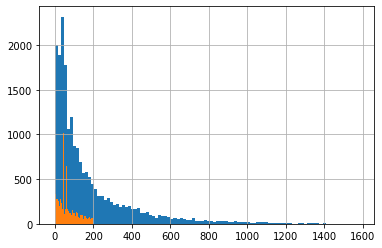

In [37]:
#изучим время продажи квартиры
good_data['days_exposition'].hist(bins=100)
good_data['days_exposition'].hist(bins=100, range=(0,200))
print('Значение медианы =', good_data['days_exposition'].median())
print('Среднее значение =', good_data['days_exposition'].mean())
good_data['days_exposition'].max()
good_data['days_exposition'].value_counts()
good_data['days_exposition'].describe()

Значение медианы составляет 95, а среднее почти в два раза больше, на него сильно влияют выбросы слишком долгоих продаж квартир, значение которых доходит до 1580 дней. Половина всех объявлений размещены в интервале от 45 до 232 дней. 

Изучив гистограмму со значениями от 0 до 200, заметны выбросы, с помощью метода value_counts() выяснилось что большое количество объявлений снимается спустя 45 и 60 дней, скорее всего это ограничение на платформе, после которого объявление нужно самостоятельно продлевать.

---

### Построим для каждого параметра ящик с усами, что бы исключить редкие и выбивающиеся значения.

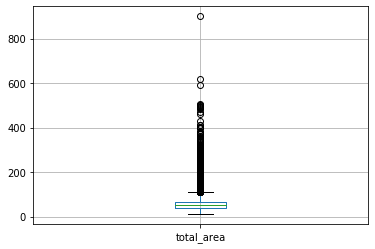

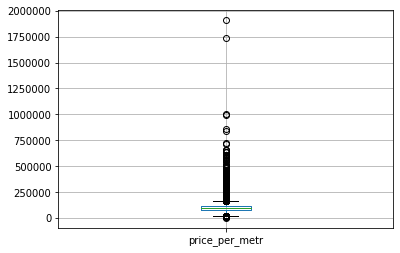

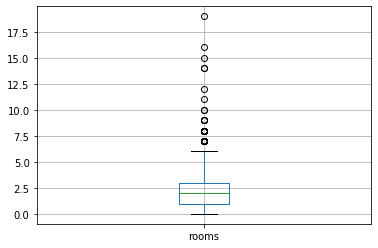

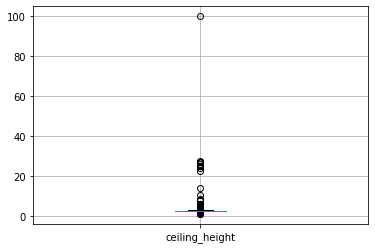

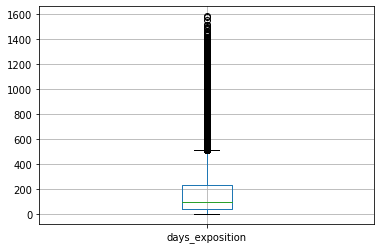

In [12]:
column_list = ['total_area', 'price_per_metr', 'rooms', 'ceiling_height', 'days_exposition']

for column in column_list:
    good_data.boxplot(column)
    plt.show()

Будем считать выбросами все значения, которые ниже 1% наблюдений и выше чем 99% наблюдений.

In [13]:
area95 = good_data['total_area'].quantile(0.99)
area05 = good_data['total_area'].quantile(0.01)
price95 = good_data['price_per_metr'].quantile(0.99)
price05 = good_data['price_per_metr'].quantile(0.01)
rooms95 = good_data['rooms'].quantile(0.99)
ceil95 = good_data['ceiling_height'].quantile(0.99)
ceil05 = good_data['ceiling_height'].quantile(0.01)
exp95 = good_data['days_exposition'].quantile(0.99)
exp05 = good_data['days_exposition'].quantile(0.01)

good_data2 = good_data.query('@area05 < total_area < @area95 and @price05 < price_per_metr < @price95 and rooms < @rooms95 and @ceil05 < ceiling_height < @ceil95  and @exp05 < days_exposition < @exp95')
good_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15967 entries, 1 to 23697
Data columns (total 29 columns):
total_images            15967 non-null int64
last_price              15967 non-null int64
total_area              15967 non-null float64
first_day_exposition    15967 non-null datetime64[ns]
rooms                   15967 non-null int64
ceiling_height          15967 non-null float64
floors_total            15967 non-null int64
living_area             15967 non-null float64
floor                   15967 non-null int64
is_apartment            15967 non-null bool
studio                  15967 non-null bool
open_plan               15967 non-null bool
kitchen_area            15967 non-null float64
balcony                 15967 non-null int64
locality_name           15967 non-null object
airports_nearest        12453 non-null float64
cityCenters_nearest     15967 non-null float64
parks_around3000        12471 non-null float64
parks_nearest           5308 non-null float64
ponds_around30

---

### Изучим факторы влияющие на стоимость квартиры

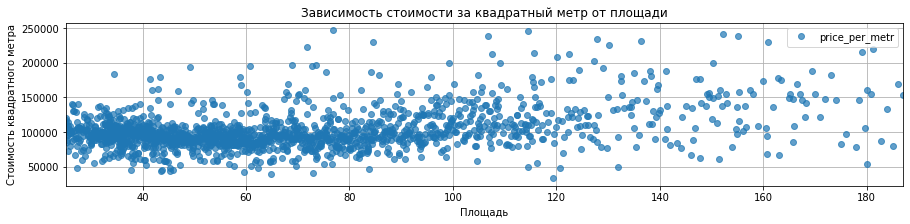

Коэффициент корреляции Пирсона: 0.16127944172205053


In [14]:
#цена за квадратный метр от общей площади
(good_data2
         .pivot_table(index='total_area',values='price_per_metr', aggfunc='median')
         .plot(grid=True, figsize=(15,3), style='o', alpha=0.7, title='Зависимость стоимости за квадратный метр от площади')
)
plt.ylabel('Стоимость квадратного метра')
plt.xlabel('Площадь')
plt.show()
print('Коэффициент корреляции Пирсона:', good_data2['price_per_metr'].corr(good_data2['total_area']))

Согласно коэфициенту корреляции Пирсона, зависимость очень слабая. Другими словами, с увеличением квадратных метров в квартире, стоимость за квадратный метр не увеличивается.

---

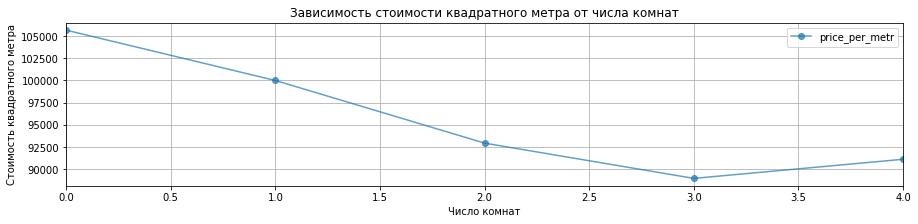

Коэффициент корреляции Пирсона: -0.07331815003248834


In [15]:
#цена за квадратный метр от числа комнат
(good_data2
         .pivot_table(index='rooms',values='price_per_metr', aggfunc='median')
         .plot(grid=True, figsize=(15,3), style='o-', alpha=0.7, title='Зависимость стоимости квадратного метра от числа комнат')
)
plt.ylabel('Стоимость квадратного метра')
plt.xlabel('Число комнат')
plt.show()
print('Коэффициент корреляции Пирсона:', good_data2['price_per_metr'].corr(good_data2['rooms']))

Чем ближе количество комнат к 3, тем ниже стоимость одного квадратного метра.

---

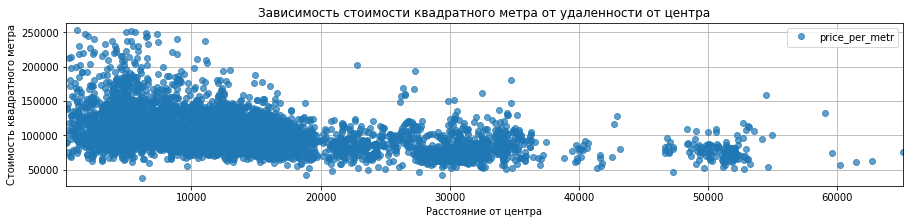

Коэффициент корреляции Пирсона: -0.3004830927266249


In [16]:
#цена за квадратный метр от удаленности от центра
(good_data2
         .pivot_table(index='cityCenters_nearest',values='price_per_metr', aggfunc='median')
         .plot(grid=True, figsize=(15,3), style='o', alpha=0.7, title='Зависимость стоимости квадратного метра от удаленности от центра')
)
plt.ylabel('Стоимость квадратного метра')
plt.xlabel('Расстояние от центра')
plt.show()
print('Коэффициент корреляции Пирсона:', good_data2['price_per_metr'].corr(good_data2['cityCenters_nearest']))

Прослеживается зависимость, чем ближе к центру, тем чаще встречаются более высокие цены за квадратный метр.

---

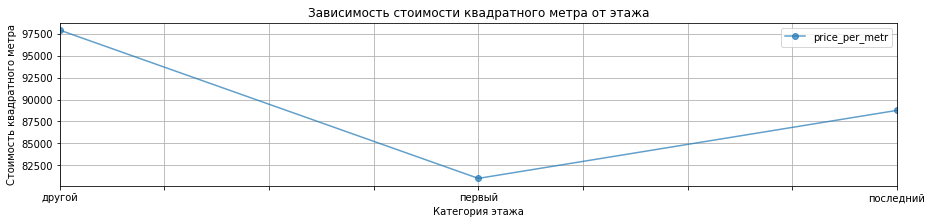

In [17]:
#цена за квадратный метр от этажа
(good_data2
         .groupby('floor_category').agg({'price_per_metr':'median'})
         .plot(grid=True, figsize=(15,3), style='o-',alpha=0.7, title='Зависимость стоимости квадратного метра от этажа')
)
plt.ylabel('Стоимость квадратного метра')
plt.xlabel('Категория этажа')
plt.show()

Стоимость квадратного метра на первых этажах ниже чем на любом другом.

---

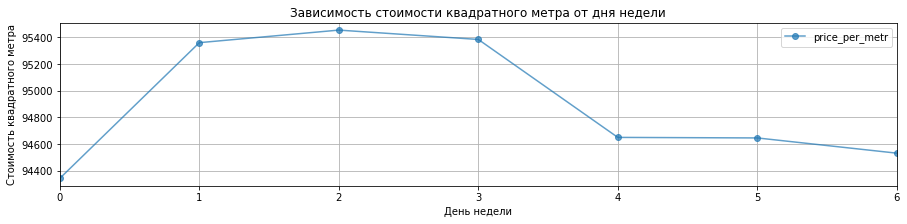

In [18]:
#цена за метр от дня недели
(good_data2
         .groupby('weekday').agg({'price_per_metr':'median'})
         .plot(grid=True, figsize=(15,3), style='o-',alpha=0.7, title='Зависимость стоимости квадратного метра от дня недели')
)
plt.ylabel('Стоимость квадратного метра')
plt.xlabel('День недели')
plt.show()

В будние дни, цена за квадратный метр выше, чем на выходных. Возможно, это связано с тем, что по будням дням объявления о продаже выставляют в основном риэлторы, по слегка завышенной стоимости. В выходные же дни выставляются объявления от людей не связанных с этой профессией.

---

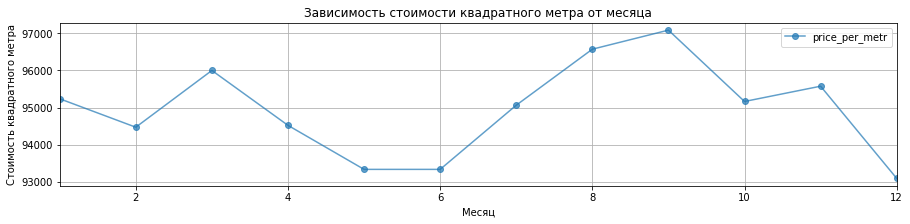

In [19]:
#цена за метр от месяца
(good_data2
         .groupby('month').agg({'price_per_metr':'median'})
         .plot(grid=True, figsize=(15,3), style='o-',alpha=0.7, title='Зависимость стоимости квадратного метра от месяца')
)
plt.ylabel('Стоимость квадратного метра')
plt.xlabel('Месяц')
plt.show()

Прослеживается зависимость стоимости квадратного метра от месяца выставление объявления. В декабре стоимость самая низкая, из-за отсутствия спроса на покупку квартир. Так же можно увидеть сезонность с пиками в марте и сентябре, как мне кажется в это время чаще всего сдаются построенные дома.

---

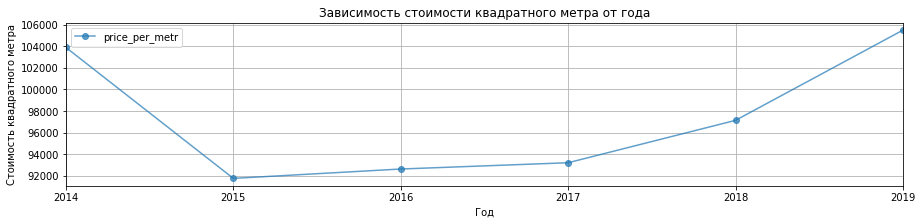

In [20]:
#цена за метр от года
(good_data2
         .groupby('year').agg({'price_per_metr':'median'})
         .plot(grid=True, figsize=(15,3), style='o-',alpha=0.7, title='Зависимость стоимости квадратного метра от года')
)
plt.ylabel('Стоимость квадратного метра')
plt.xlabel('Год')
plt.show()

В 2014 году стоимость квадратного метра была значительно выше, по политическим причинам. К 2015 году ситуация изменилась, но начиная с 2015 года, стоимость квадратного метра постоянно растет, это связано со слабой позицией национальной валюты.

---


In [21]:
#выделим 10 населённых пунктов с наибольшим числом объявлений.
top10 = good_data2.groupby('locality_name').agg({'first_day_exposition':'count','price_per_metr':'median'})
top10.sort_values(by=('first_day_exposition'),ascending=False).head(10)


,first_day_exposition,price_per_metr
locality_name,,
санкт-петербург,10717,103769.0
мурино,487,84146.0
шушары,365,75917.0
всеволожск,298,65843.0
парголово,279,91642.0
кудрово,272,91030.5
пушкин,217,99744.0
колпино,206,74230.5
гатчина,201,68561.0


Самый высокий уровень стоимости жилья в Санкт-Петербурге, а самый низкий в Выборге.


---

In [22]:
#выделим квартиры в Санкт-Петербурге
spb_data = good_data2.query('locality_name == "санкт-петербург"')
spb_data.head()
#округленим расстояние до центра в км
spb_data['cityCenters_km']=spb_data['cityCenters_nearest'] // 1000
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_category,price_per_metr,living_ratio,kitchen_ratio,weekday,month,year,cityCenters_km
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574.0,558,другой,92785,0.612500,0.148214,3,8,2015,13.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,другой,100000,0.320000,0.410000,1,6,2018,8.0
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,553.0,137,другой,127525,0.512626,0.214646,3,11,2017,13.0
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,296.0,19,другой,119230,0.525641,0.194872,5,11,2017,14.0
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,NaN,397,первый,81707,0.678049,0.109756,3,11,2017,10.0


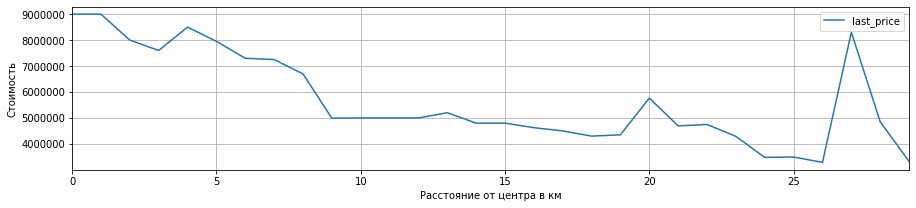

,first_day_exposition,last_price
cityCenters_km,,
0.0,43,10291813.95
1.0,128,10060437.49
2.0,171,9198823.98
3.0,317,8921658.70
4.0,581,10180722.76
5.0,477,9454510.70
6.0,312,8714658.42
7.0,283,8758563.12
8.0,467,8126406.22


In [23]:
#построим график стоимости квартир в зависимости от удаленности от центра в км
(spb_data
     .pivot_table(index='cityCenters_km', values='last_price', aggfunc='median')
     .plot(grid=True, figsize=(15, 3))
) 
plt.ylabel('Стоимость')
plt.xlabel('Расстояние от центра в км')
plt.show()
#средняя стоимость на каждый километр
per_km = spb_data.groupby('cityCenters_km').agg({'first_day_exposition':'count','last_price':'mean'})
per_km.sort_values(by=('cityCenters_km'),ascending=True).style.format({'last_price':'{:.2f}'})

На графике видно, что после 8км цена резко снижается, в этом месте и находится граница центральной зоны. Так же заметен выброс в районе 27км.

---


### Исследуем центр Санкт-Петербурга

In [24]:
#выберем только квартиры в центре
spb_center = spb_data.query('cityCenters_km <= 8')
spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,floor_category,price_per_metr,living_ratio,kitchen_ratio,weekday,month,year,cityCenters_km
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,другой,100000,0.320000,0.410000,1,6,2018,8.0
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,124.0,265,первый,66872,0.478395,0.201646,5,10,2015,2.0
61,18,7990000,74.0,2017-08-24,2,2.65,4,43.0,4,False,...,NaN,609,последний,107972,0.581081,0.270270,3,8,2017,4.0
63,2,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,779.0,37,другой,169491,0.576271,0.135593,1,9,2018,4.0
70,9,3400000,30.0,2018-09-05,1,2.65,5,16.0,1,False,...,NaN,14,первый,113333,0.533333,0.233333,2,9,2018,8.0


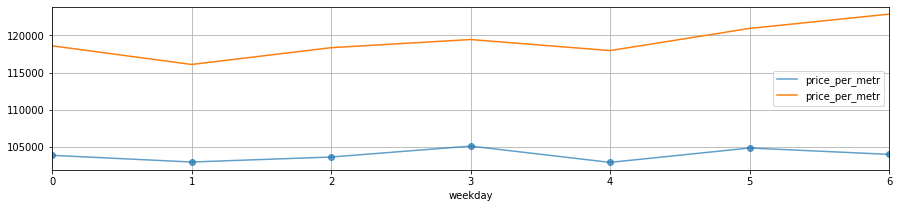

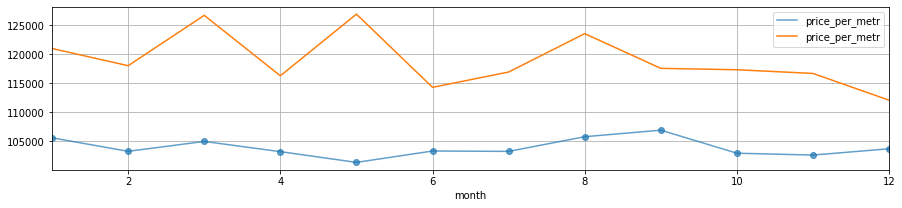

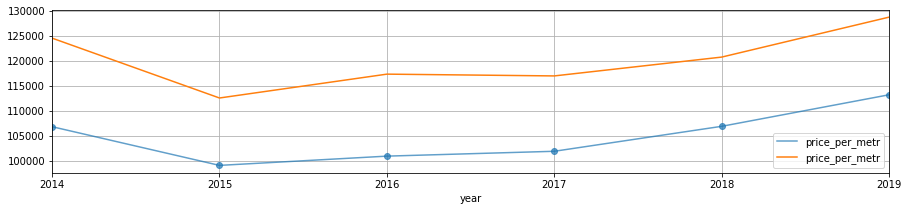

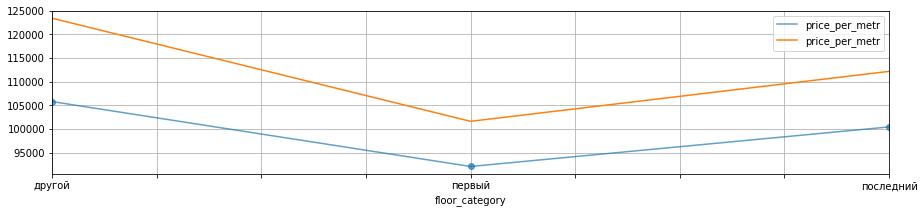

In [32]:
#построим графики сравнения центра и Петербурга в общем
column_list = ['weekday', 'month', 'year', 'floor_category']

for column in column_list:
    ax = spb_data.groupby(column).agg({'price_per_metr':'median'}).plot(grid=True, figsize=(15,3), style='o-',alpha=0.7)
    spb_center.groupby(column).agg({'price_per_metr':'median'}).plot(figsize=(15, 3), grid=True, ax=ax)
    plt.show()

 - Различия между центром Санкт-Петербурга и Петербурга в общем присутсвуют только в месяце выставления объявлений. В остальном графики ведут себя одинаково.
 
 ---

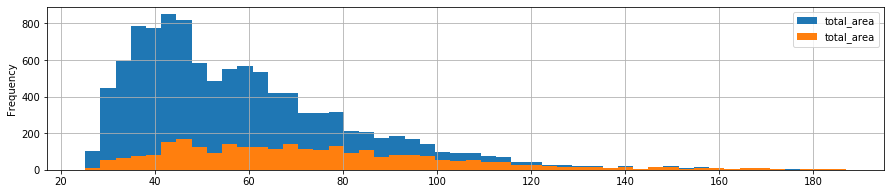

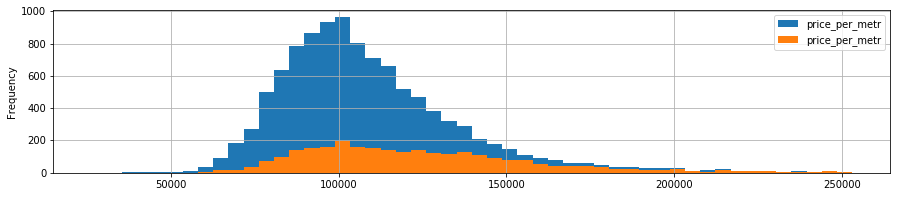

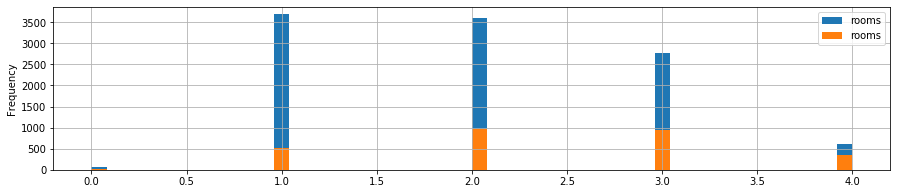

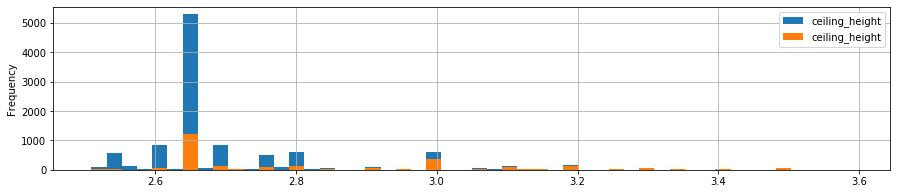

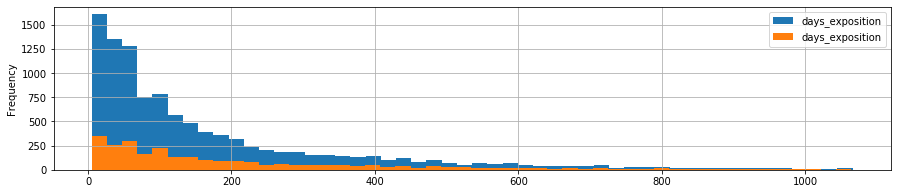

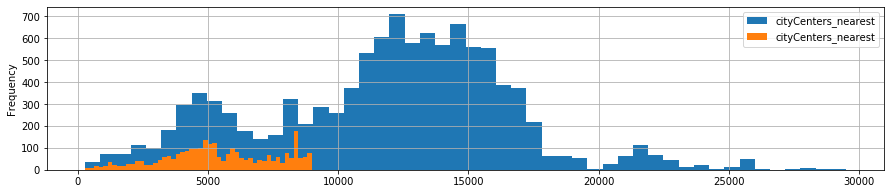

In [36]:
#построим гистограммы для сравнения центра и Петербурга в целом
column_list = ['total_area', 'price_per_metr', 'rooms', 'ceiling_height', 'days_exposition','cityCenters_nearest']

for column in column_list:
    ax = spb_data.plot(y=column, kind='hist', figsize=(15, 3), bins=50, grid=True)
    spb_center.plot(y=column, kind='hist', figsize=(15, 3), bins=50, grid=True, ax=ax)
    plt.show()

##### Вывод:

1. Большая часть квартир в центре Петербурга от 40 м2, в отличии от общей выборки по всему Петербургу, где квартиры до 40м2 являются существенной частью.

2. Закономерно что за квадратный метр в центре выше нежели в Петербурге в общем.

3. В центре Петербурга больше представлены двух и трех комнатные квартиры. А так же в центре чаще можно встретить 4 комнатные квартиры в отличии от все выборки по Петербургу, где больше всего представлены однокомнатные и двухкомнатные квартиры.

4. Квартиры с потолками от 3м в центре частое явление, что не скажешь о остальной части Петербурга.

5. Время размещения объявлений распределено похожим образом.

6. Распределение до центра так же не изменилось.

---



## Шаг 5. Общий вывод

В ходе исследования объявлений о продаже квартир мы обработали полученные данные - заполнили пропущенные значения там, где это было нужно, заменили типы данных на необходимые для удобства анализа. Посчитали и добавили в таблицу цену квадратного метра, дни недели, месяц и год размещения объявлений, добавили категории по этажам квартир. 

Изучили следующие параметры: площадь, цена, число комнат, высота потолков. Были обнаружены выделяющиеся значения. Мы выявили, что на стоимость квадратного метра квартиры больше всего оказывают влияние следующие параметры: этаж квартиры, близость к центру, количество комнат, месяц размещения объявления. Незначительно на стоимость квадратного метра влияют день, год размещения и общая площадь.
Стоимость квартир на первом этаже гораздо ниже, чем на других этажах, в центре города эта тенденция сохраняется. 
Удаленность от центра играет значительную роль в цене, самая дорогая недвижимость находится в пределах 8 километров от центра, далее цена постепенно снижается. Среднее время размещения объявления - 180 дней. Очень быстрой продажей можно считать продажу в течении 1 дня, необычно долгой свыше 500 дней.
Была выявлена тенденция роста стоимости квартир начиная с 2015 года.

